<h1 style="color: blue;"><center><font size="6">Default of Credit Card Clients - Predictive Models</font></center></h1>

# I. Business understanding:

<h2 style="color: red;">Plan et objectives : </h2> 


En Analysant le problème :nous allons prédire les données sur les clients afin de trouver qui sont défaillants et non défaillants le mois prochain.
- L'objectif est de savoir si les clients sont en mesure de payer le montant de leur crédit du mois prochain.
- Identifier quelques clients potentiels pour la banque qui peuvent régler leur solde créditeur.
- Déterminer si leurs clients pouvaient effectuer les paiements par carte de crédit à temps.






<h2 style="color: red;">Introduction : </h2> 

## Dataset

Cet ensemble de données contient des informations sur les paiements par défaut, les facteurs démographiques, les données de crédit, l historique des paiements et les relevés de facture des clients de cartes de crédit à Taïwan d'avril 2005 à septembre 2005.
## Content

Il y a  25 variables:

**ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)



# II. Data understanding

<h2>Importation des bibliothèques  :  </h2> 

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [196]:
from matplotlib import rcParams
%matplotlib inline

<h3>Importation et affichage de la base de données</h3>

In [197]:
#Pour afficher toutes les colonnes
df = pd.read_excel('default of credit card clients.xls',header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [198]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [199]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [200]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


<h3>Dimensions de la Base de Données</h3>

In [201]:
#Taille de la base et types : 
print("Les dimensions de la base de données sont : " )
print(" * Nonmbre de lignes est :", df.shape[0] )
print(" * Nonmbre de colonnes est :", df.shape[1] )
print(df.dtypes.value_counts())


Les dimensions de la base de données sont : 
 * Nonmbre de lignes est : 30000
 * Nonmbre de colonnes est : 25
int64    25
dtype: int64


##### Notre base contient 30000 lignes et 25 variables  .

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

<h3>Affichage des features</h3>

In [203]:
#Affichage des noms de colonnes 
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [204]:
#Verification de types des donneés
df.dtypes


ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

<h2 style="color:green">l'unicité des contenus des Features :</h2>


In [205]:
cat_cols= ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
          'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
          'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
          'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
          'default payment next month']
for i in cat_cols:
    print(i," : ",df[i].unique())

LIMIT_BAL  :  [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
SEX  :  [2 1]
EDUCATION  :  [2 1 3 5 4 6 0]
MARRIAGE  :  [1 2 3 0]
AGE  :  [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0  :  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2  :  [ 2  0 -1 -2  3  5  7  4  

<h1 style="color:green">détection des valeurs manquantes : </h1> 

In [206]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [207]:
print("presence des valeurs Nan :",df.isnull().values.any())

presence des valeurs Nan : False


#### Conclusion : Notre base de donnees ne contient pas des valeurs manquantes .

<h3>Observation : </h3>

In [208]:
#connaitre les clients risqué et non risqué par numerique
print(df.groupby('default payment next month').size())

default payment next month
0    23364
1     6636
dtype: int64


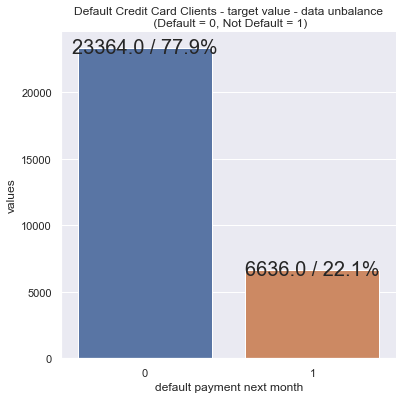

In [209]:
#connaitre les clients risqué ou non risqué par figure
temp = df["default payment next month"].value_counts()
total_cnt = df['default payment next month'].count()
data = pd.DataFrame({'default payment next month': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
ax=sns.barplot(x = 'default payment next month', y="values", data=data)
locs, labels = plt.xticks()
for p in ax.patches:
    x, height , width = p.get_x() , p.get_height() , p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()


<h4>CONCLUSION :Nous pouvons voir que l'ensemble de données se compose de 77% des clients ne devraient pas faire défaut de paiement alors que 23% des clients devraient faire défaut de paiement.</h4> 


## SEX :  

In [210]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [211]:
df['default payment next month'].groupby(df['SEX']).value_counts(normalize=False)

SEX  default payment next month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default payment next month, dtype: int64

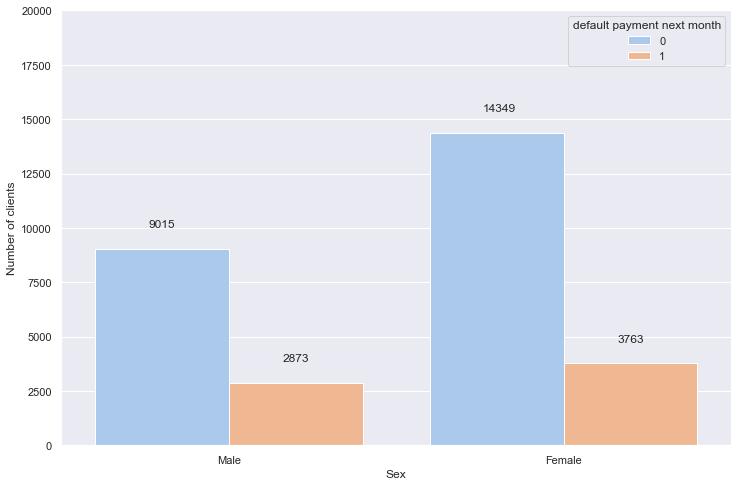

In [212]:
sns.set(font_scale=1)
plt.figure(figsize=(12,8))
ax = sns.countplot(x='SEX' ,hue="default payment next month", data=df,  palette = 'pastel')
plt.xlabel('Sex')
plt.ylabel('Number of clients')
plt.ylim(0,20000)
plt.xticks([0,1], ['Male', 'Female'])
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))
plt.show()

#### Interpretation : les femmes sont plus risquées que les hommes à ne pas payer leurs credit .

## Education : 

In [213]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [214]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

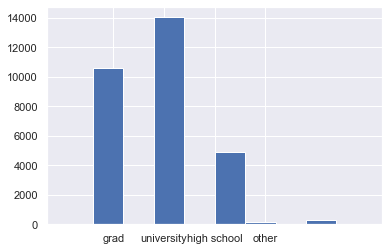

In [215]:
plt.hist(df['EDUCATION'])
plt.xticks([1,2,3,4],['grad','university','high school','other'])
plt.show()

### on peut negliger 0,4 et 6 par rapport les autres et on les remplacer par 5

In [216]:
#remplacer les valeurs 0,4,6 par 5 dans la colonne education
df_0 = df['EDUCATION'].replace(0,5)
df_5 = df_0.replace(4,5)
df_6 = df_5.replace(6,5)
df['EDUCATION'] = df_6
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      468
Name: EDUCATION, dtype: int64

In [217]:
df['default payment next month'].groupby(df['EDUCATION']).value_counts()

EDUCATION  default payment next month
1          0                              8549
           1                              2036
2          0                             10700
           1                              3330
3          0                              3680
           1                              1237
5          0                               435
           1                                33
Name: default payment next month, dtype: int64

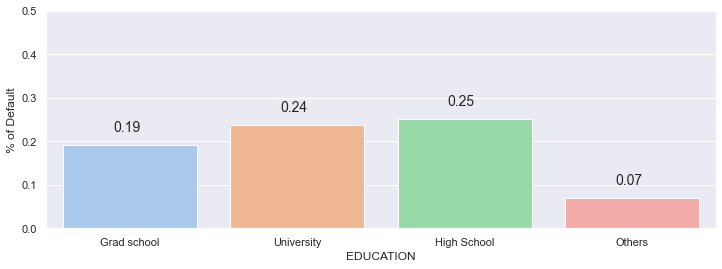

In [218]:
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df , x='EDUCATION', y="default payment next month",palette = 'pastel' , ci=None)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Grad school', 'University', 'High School','Others'],fontsize=11)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03), fontsize=14)

plt.show()

#### conclusion : les personnes du niveau educative 'high school' ont une forte probabilité de ne pas payer leur credit .

## Marriage : 

In [219]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

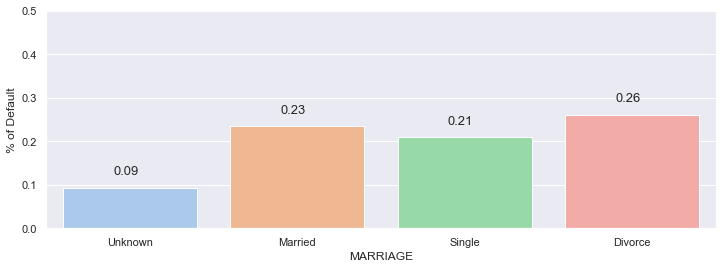

In [30]:
#La Relation entre le 'default payment next month' et le mariage ;
plt.figure(figsize=(12,4))
sns.set(font_scale=1)
ax = sns.barplot(x = "MARRIAGE", y = "default payment next month", data = df, palette = 'pastel', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single', 'Divorce'], fontsize = 11)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()


##### Conclusion: La plupart des gens appartiennent à la catégorie « marié » ou « divorcé ».
##### La catégorie inconnue présente une probabilité de défaut plus faible

### Comparaison homme/femme
#### considérant un niveau d'éducation et un statut similaires (« marié » ou « divorcé »)

In [31]:
df.groupby(by=['MARRIAGE', 'SEX'])['default payment next month'].value_counts()

MARRIAGE  SEX  default payment next month
0         1    0                               12
               1                                2
          2    0                               37
               1                                3
1         1    0                             3844
               1                             1346
          2    0                             6609
               1                             1860
2         1    0                             5068
               1                             1485
          2    0                             7555
               1                             1856
3         1    0                               91
               1                               40
          2    0                              148
               1                               44
Name: default payment next month, dtype: int64

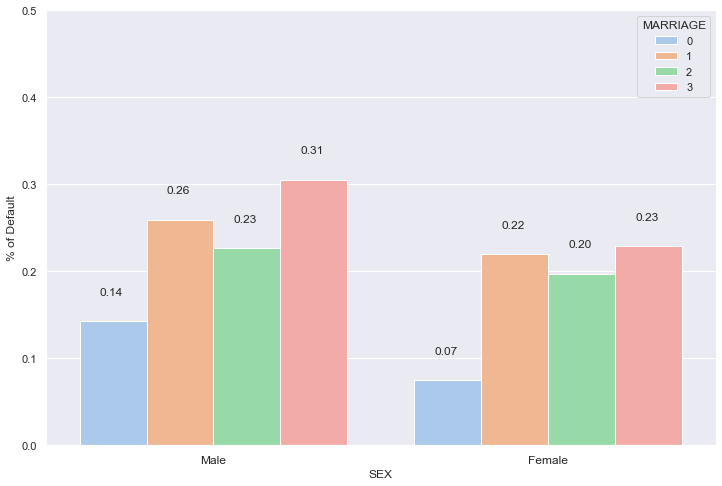

In [32]:
#figure presente la relation entre les 3 features : Sex , Marriage , Default payment next month 
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
ax = sns.barplot(x = "SEX", y = "default payment next month", hue = "MARRIAGE", data = df, palette = 'pastel', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.06, p.get_height()+0.03),fontsize=12)

plt.show()

### Interpretaion : peut importe le sex de l'individu , on remarque que la probabilité de risque d'un client divorcé est la plus élevée

## Education / Sexe / Default payment next month 

In [33]:
df.groupby(by=['EDUCATION','SEX'])['default payment next month'].value_counts(normalize=True)

EDUCATION  SEX  default payment next month
1          1    0                             0.791915
                1                             0.208085
           2    0                             0.818649
                1                             0.181351
2          1    0                             0.737998
                1                             0.262002
           2    0                             0.777957
                1                             0.222043
3          1    0                             0.726131
                1                             0.273869
           2    0                             0.763580
                1                             0.236420
4          1    0                             0.917647
                1                             0.082353
           2    0                             0.936242
                1                             0.063758
Name: default payment next month, dtype: float64

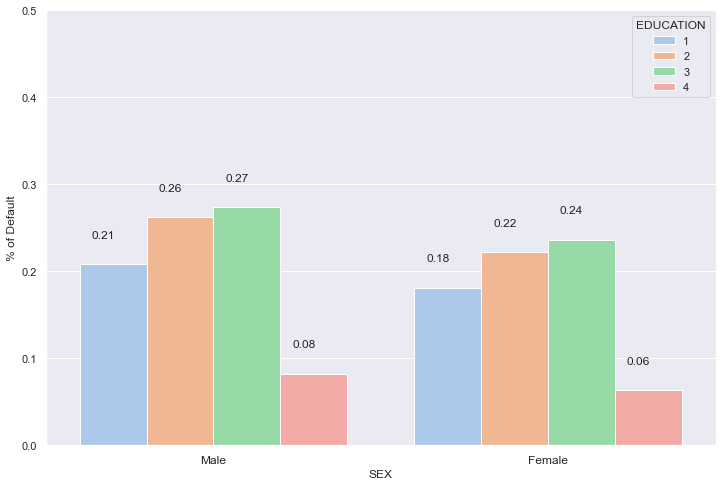

In [34]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
ax = sns.barplot(x = "SEX", y = "default payment next month", hue = "EDUCATION", data = df, palette = 'pastel', ci = None)

plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.035, p.get_height()+0.03),fontsize=12)

plt.show()

##### Conclusion: Dans chaque comparaison, la probabilité était plus élevée pour les hommes

### AGE: 

In [35]:
df.AGE.unique().sum()

2719

<AxesSubplot:>

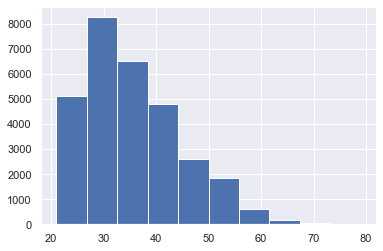

In [36]:
# Histogramme des tranches d'âge
df['AGE'].hist()

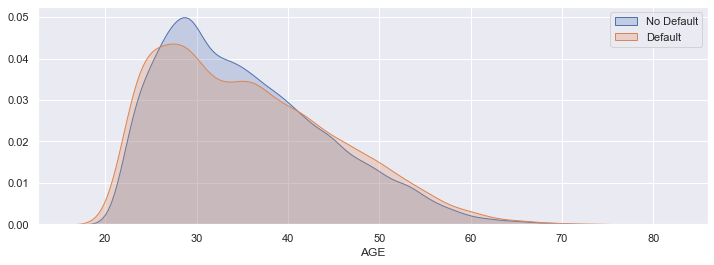

In [37]:
# Relation entre default payment et les diff tranche d'âge 
sns.set(font_scale=1)
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[(df['default payment next month'] == 0), 'AGE'], label='No Default', shade=True) # kernel density estiamtion 
sns.kdeplot(df.loc[(df['default payment next month'] == 1), 'AGE'] ,label='Default', shade=True)
plt.ticklabel_format(style='plain', axis='x') 
plt.ylabel('')
plt.legend()
plt.show()

##### Conclusion: Entre 25 et 40 ans le risque de défaut est un peu plus faible

## Montant de credit accordé (LIMIT_BAL)

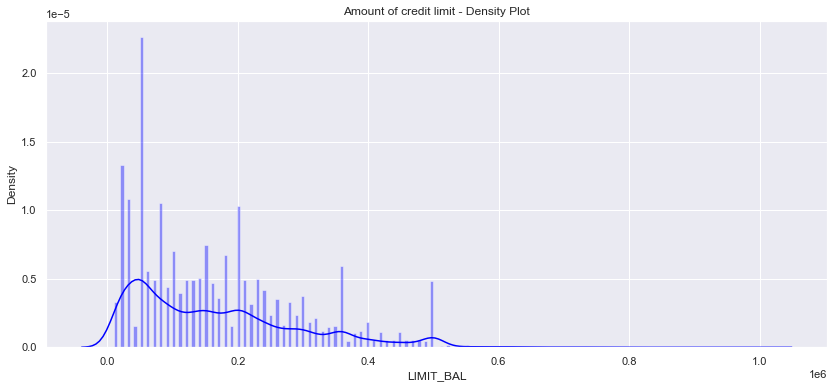

In [38]:
#Montant de credit accordé (LIMIT_BAL)
#densité(pourcentage) des clients qui ont un montant de crédit maximum 
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

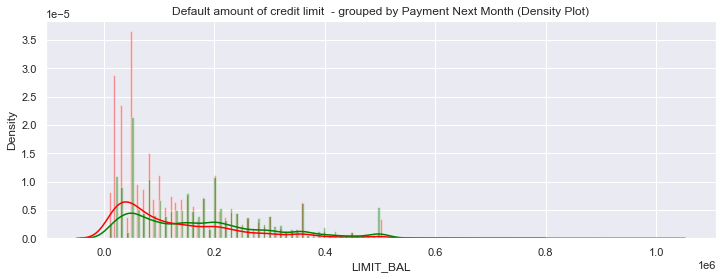

In [39]:
#Montant de la limite de crédit regroupé par défaut de paiement le mois prochain en classifiant les clients risqué et non risqué
class_0 = df.loc[df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (12,4))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

#### Interprétation :
La plupart des clients risqués concernent des limites de crédit de 0 à 100 000 (et la densité pour cet intervalle est plus grande pour clients risqués que pour les non risqués).
Le plus grand nombre de valeurs par défaut correspond aux montants de 50 000, 20 000 et 30 000.


Nous pouvons constater qu'une faible pourcentage des personnes ont un LIMIT_BAL de 1 000 000 dollars, ce qui a faussé l'ensemble de données. La suppression de certaines valeurs aberrantes serait utile dans ce cas .

## Repayment Status : [PAY]

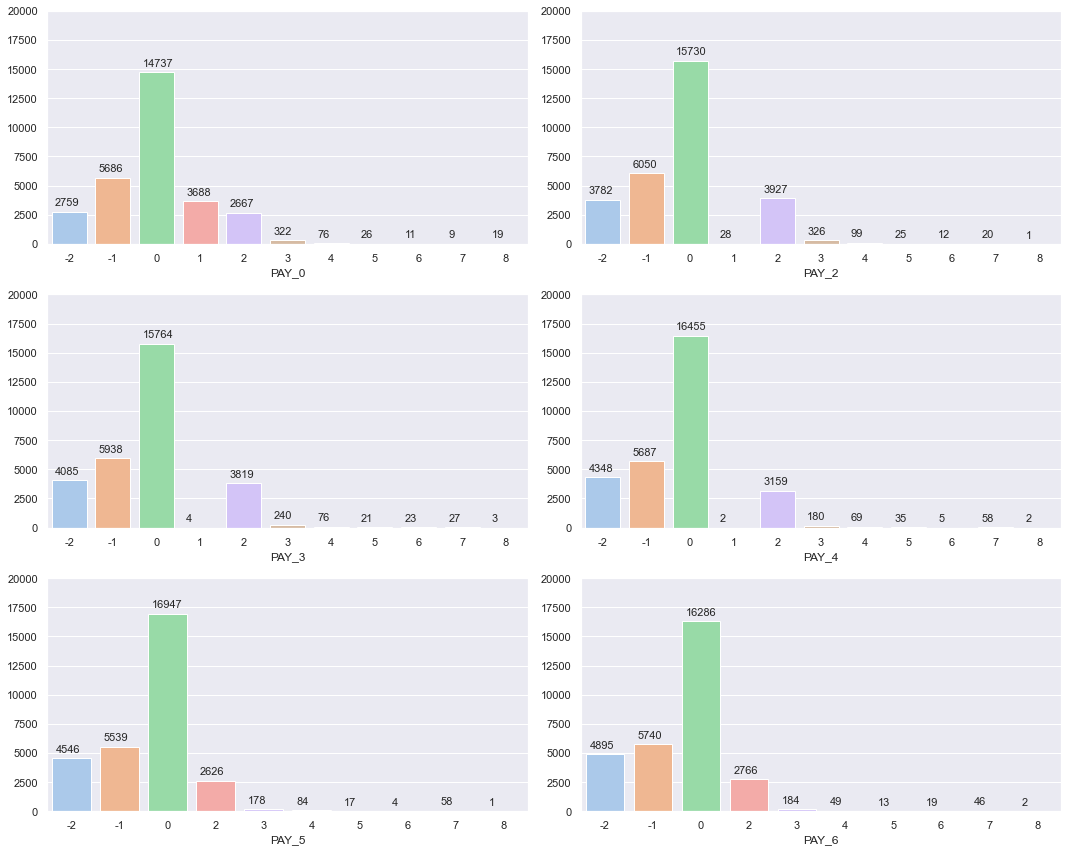

In [40]:
# ces graphes décrient l'état de remboursement des diff mois   
pay_x_fts = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(pay_x_fts):
    plt.subplot(3,2,i+1)
    ax = sns.countplot(df.loc[:,col], palette = 'pastel')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()) , (p.get_x() + 0.08 , p.get_height()+500), fontsize = 11)
plt.show()

##### Conclusion : La plupart des clients paient dûment leurs factures de carte de crédit.


## Amount of Bill Statement (BILL_AMTX)

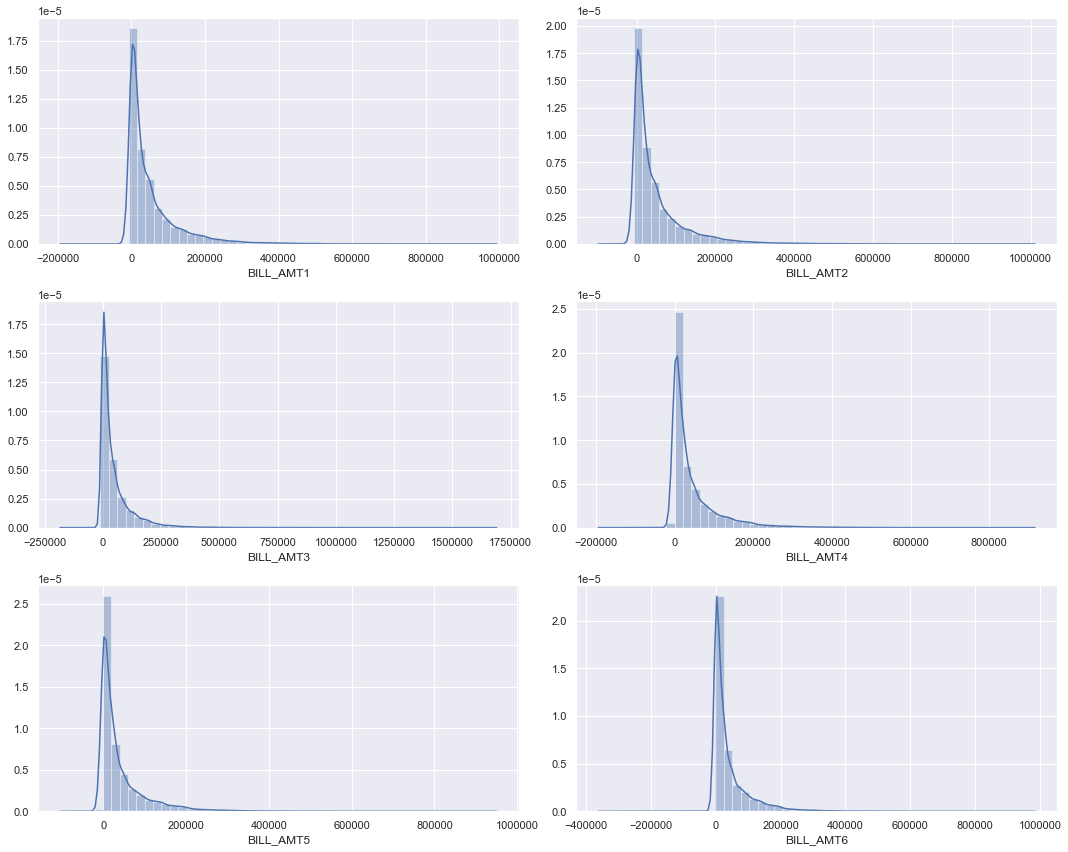

In [41]:
# feature : Amount of Bill Statement (BILL_AMTX)
sns.set(font_scale=1)

bill_amtx_fts = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ylabel('')
    plt.tight_layout()

plt.show()

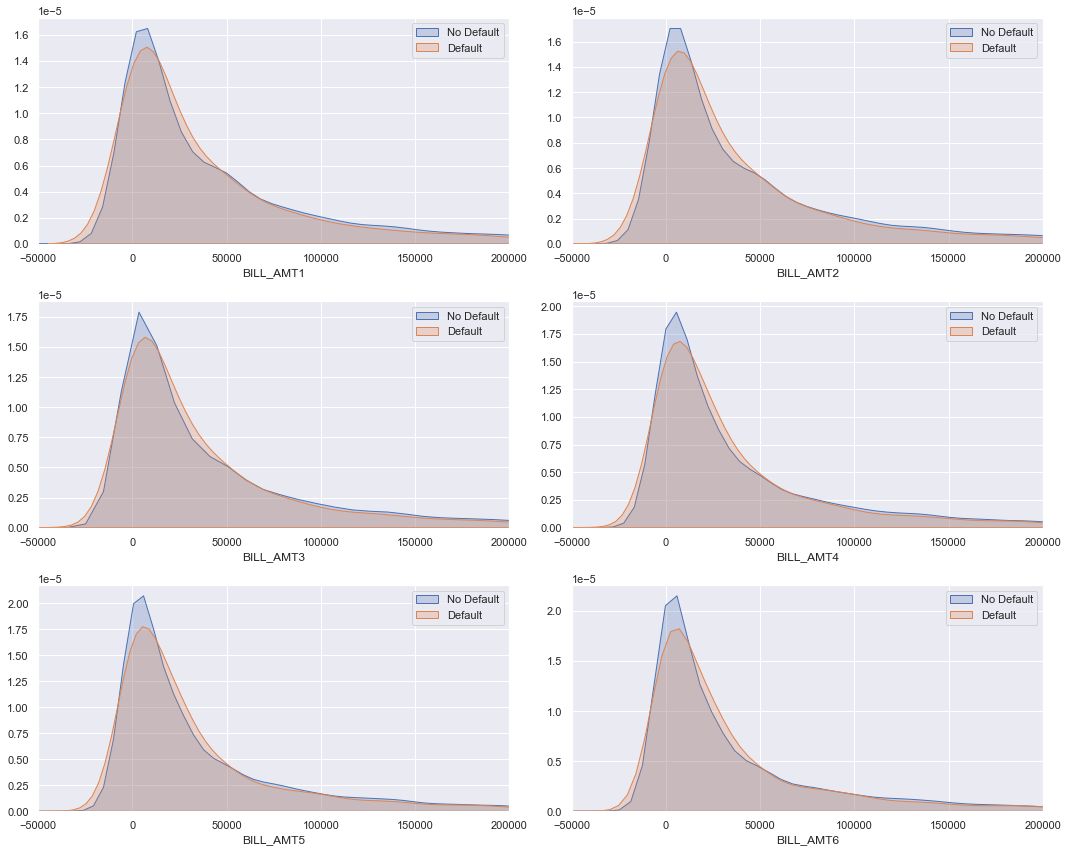

In [42]:
#relation entre Bill_amt et default payment next month 
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
for i,col in enumerate(bill_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df.loc[(df['default payment next month'] == 0), col], label = 'No Default', shade=True)
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col], label = 'Default', shade = True)
    plt.xlim(-50000,200000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()
plt.show()

### Conclusion : on a trouvé que la majorité des factures ont un montant qui s'approche de 0 donc la plupart des clients sont classés non risqués

#### Amount of Previous Payment (PAY_AMTX) 

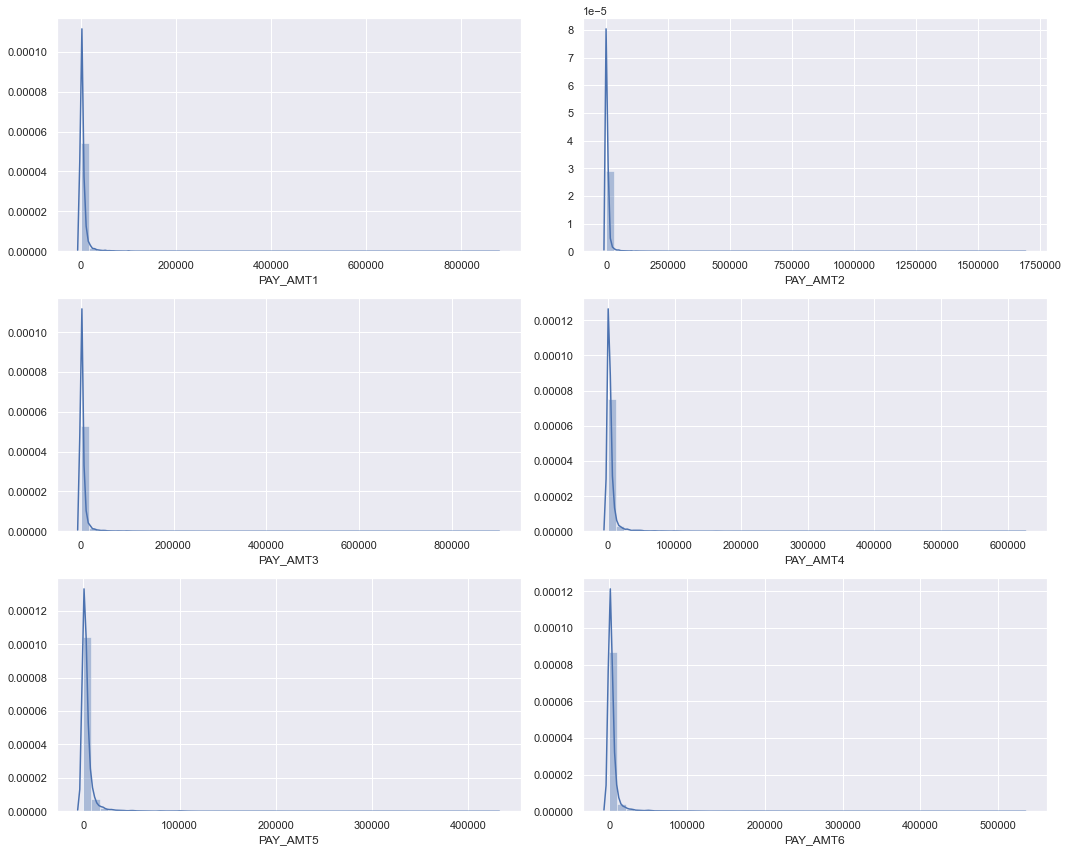

In [43]:
# Amount of Previous Payment (PAY_AMTX) 
pay_amtx_fts = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
plt.figure(figsize=(15,12))
sns.set(font_scale=1) 


for i,col in enumerate(pay_amtx_fts):
    plt.subplot(3,2,i+1)
    sns.distplot(df.loc[:,col])
    plt.ticklabel_format(style='plain', axis='x') 
    plt.ylabel('')
    plt.tight_layout()

plt.show()

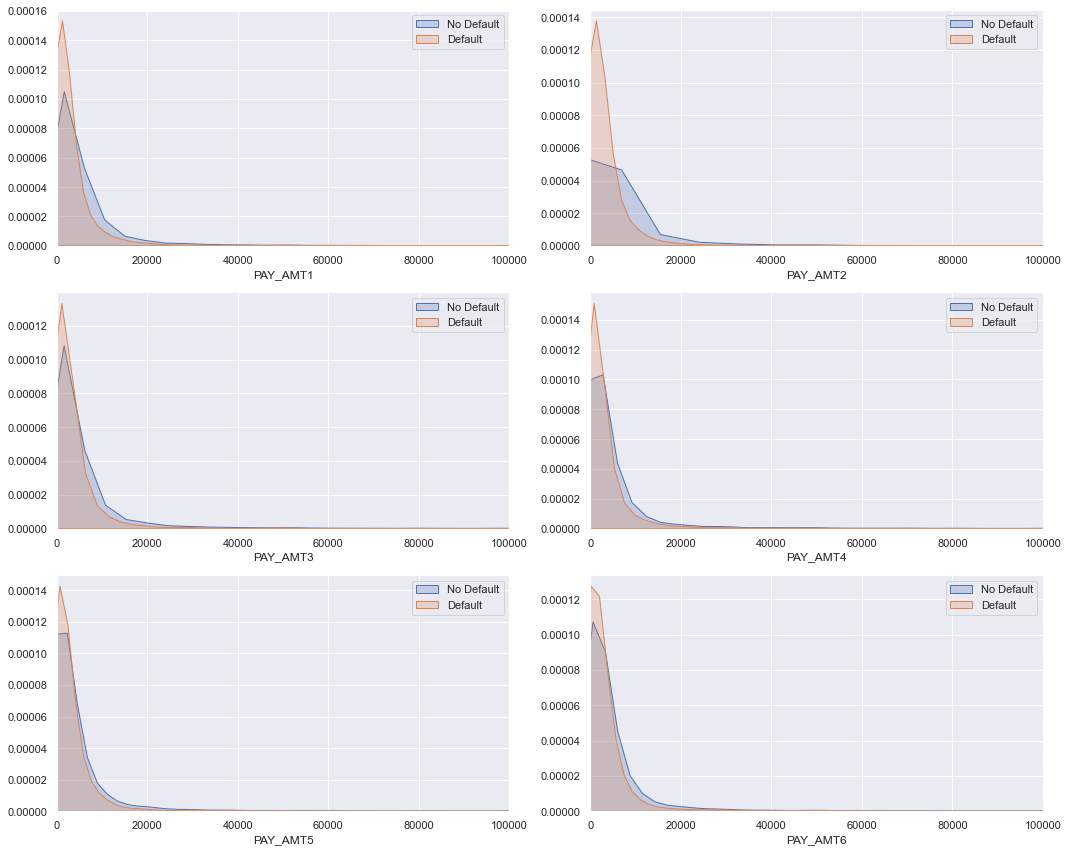

In [44]:
# Relation entre le default payment next month et les diff PAY_AMT 
plt.figure(figsize=(15,12))
sns.set(font_scale=1) 


for i,col in enumerate(pay_amtx_fts):
    plt.subplot(3,2,i + 1)   
    sns.kdeplot(df.loc[(df['default payment next month' ]== 0), col ],label  = 'No Default', shade=True )
    sns.kdeplot(df.loc[(df['default payment next month'] == 1), col ], label  = 'Default', shade = True )
    plt.xlim(0,100000)
    plt.ylabel('')
    plt.legend()
    plt.tight_layout()

plt.show()

### interpretation : on constate que la majorité des clients n'ont pas des credits à payer 

# III. Data preparation 

In [45]:
#suppression de colonne 'id'
df = df.iloc[0:,:]
df=df.drop("ID",axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [226]:
#Renommage des colonnes
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})


#### Detection des lignes dupliquées

In [227]:
#detection des lignes dupliquées
print(df.duplicated().value_counts())
df = df.drop_duplicates()
#35 doublons
df.duplicated().value_counts()

False    30000
dtype: int64


False    30000
dtype: int64

In [228]:
#Changer le type object 
df = df.astype('float')
df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','def_pay']] = df[['SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','def_pay']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  float64
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int32  
 3   EDUCATION  30000 non-null  int32  
 4   MARRIAGE   30000 non-null  int32  
 5   AGE        30000 non-null  int32  
 6   PAY_1      30000 non-null  int32  
 7   PAY_2      30000 non-null  int32  
 8   PAY_3      30000 non-null  int32  
 9   PAY_4      30000 non-null  int32  
 10  PAY_5      30000 non-null  int32  
 11  PAY_6      30000 non-null  int32  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

#### Corrélation entre les featutres 

<AxesSubplot:>

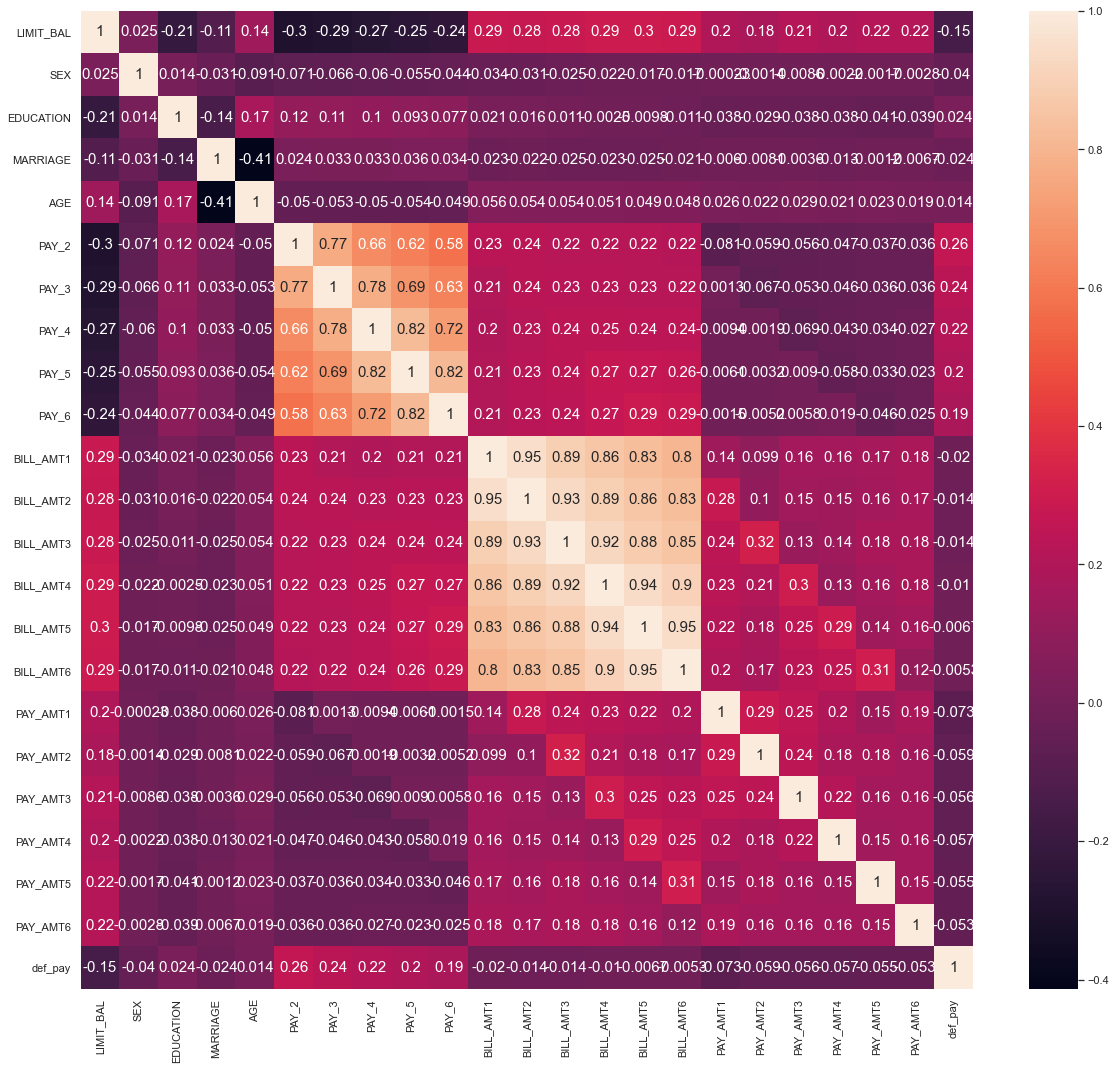

In [229]:
#Graphe représentant la corrélation entre les featutres deux à deux
import matplotlib.pyplot as plt
import seaborn as sns
data_f=df.loc[1:,'LIMIT_BAL':'def_pay']
corrdata=data_f[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
                 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3',
                 'PAY_AMT4','PAY_AMT5','PAY_AMT6','def_pay']]
corr=corrdata.astype('float64').corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr,annot=True, annot_kws={"size":15})

##### Plus le coefficient est proche de 1, plus la relation linéaire positive entre les variables est forte.
##### Plus le coefficient est proche de -1 , plus la relation linéaire négative entre les variables est forte.
##### Plus le coefficient est proche de 0, plus la relation linéaire entre les variables est faible

 ### Correalation entre les features et le target 

In [51]:
#Etude de correalation entre les features et le target 
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return 

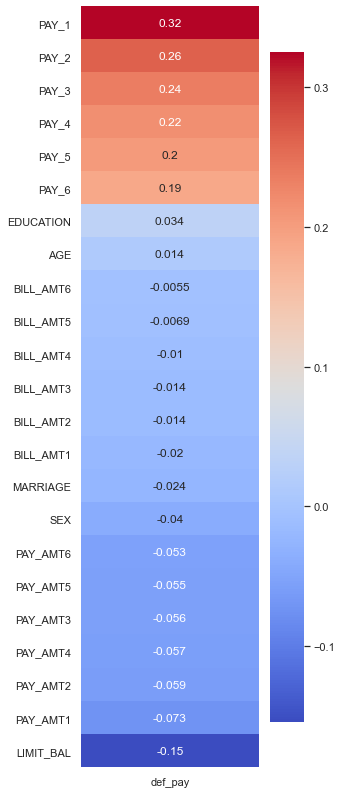

In [52]:
corr_for_target(df, 'def_pay');

#### Interprétation :
Les Features les plus corréles avec la cible sont  PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5 , PAY_6


### Supprimer toutes les lignes de PAY_0 ===> PAY_6 = -2 

In [53]:
pay_ = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
l = df[pay_][df[pay_]==-2]
l = l.dropna(axis=0)
df = df.drop(l.index,axis=0)

### Supprimer toutes les lignes de BILL_AMT1 ==> BILL_AMT6 = 0 ,  PAY_AMT1 ==> PAY8AMT6= 0

In [232]:
bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
w = df[bill_amt][df[bill_amt]==0]
w = w.dropna(axis=0)
df = df.drop(w.index,axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29205 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         29205 non-null  float64
 1   LIMIT_BAL  29205 non-null  float64
 2   SEX        29205 non-null  int32  
 3   EDUCATION  29205 non-null  int32  
 4   MARRIAGE   29205 non-null  int32  
 5   AGE        29205 non-null  int32  
 6   PAY_1      29205 non-null  int32  
 7   PAY_2      29205 non-null  int32  
 8   PAY_3      29205 non-null  int32  
 9   PAY_4      29205 non-null  int32  
 10  PAY_5      29205 non-null  int32  
 11  PAY_6      29205 non-null  int32  
 12  BILL_AMT1  29205 non-null  float64
 13  BILL_AMT2  29205 non-null  float64
 14  BILL_AMT3  29205 non-null  float64
 15  BILL_AMT4  29205 non-null  float64
 16  BILL_AMT5  29205 non-null  float64
 17  BILL_AMT6  29205 non-null  float64
 18  PAY_AMT1   29205 non-null  float64
 19  PAY_AMT2   29205 non-null  float64
 20  PAY_AM

### Education , Marriage , Sex :

In [55]:
#Encodage nominale de 'Education' 
dummies_1 = pd.get_dummies(df['EDUCATION'])
df = pd.concat([df,dummies_1],axis=1)
df = df.drop('EDUCATION',axis=1)

df = df.rename(columns = {1 : 'graduate school', 2: 'university', 3:'high school',4:'others'})

In [56]:
#Encodage nominale de 'MARRIAGE'
dummies_2 = pd.get_dummies(df['MARRIAGE'])
df = pd.concat([df,dummies_2],axis=1)
df = df.drop('MARRIAGE',axis=1)
df = df.rename(columns = {1:'married' ,2:'single' ,3:'divorce' , 0:'OTHERS'})

In [57]:
#Encodage nominale de 'SEX'
dummies_3 = pd.get_dummies(df['SEX'])
df = pd.concat([df,dummies_3],axis=1)
df = df.drop('SEX',axis=1)
df = df.rename(columns = {1:'male', 2: 'female'})
df.head(10)

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,1,0,0,0,1,0,0,0,1
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,0,1,0,0,0,0,1,0,0,1
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,1,0,0,1
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,1,0,0,0,1
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,1,0,0,1,0
5,50000.0,37,0,0,0,0,0,0,64400.0,57069.0,...,1,0,0,0,0,0,1,0,1,0
6,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,...,1,0,0,0,0,0,1,0,1,0
7,100000.0,23,0,-1,-1,0,0,-1,11876.0,380.0,...,0,1,0,0,0,0,1,0,0,1
8,140000.0,28,0,0,2,0,0,0,11285.0,14096.0,...,0,0,1,0,0,1,0,0,0,1
9,20000.0,35,-2,-2,-2,-2,-1,-1,0.0,0.0,...,0,0,1,0,0,0,1,0,1,0


## suppression des valeurs aberantes par la methode du quantile : 

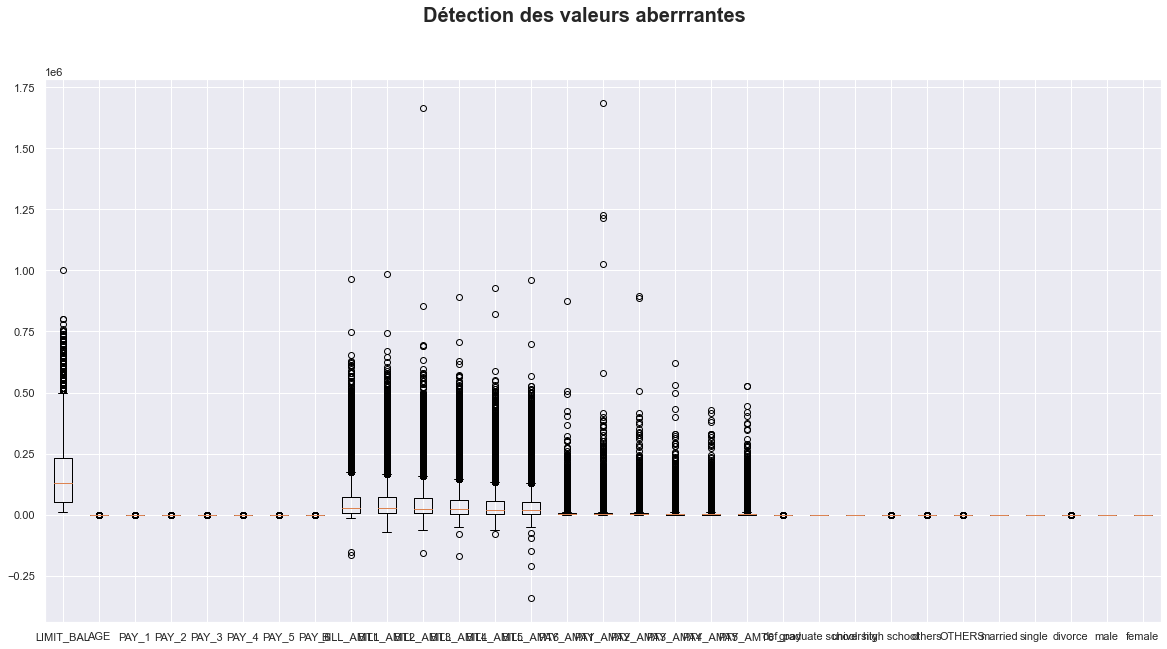

In [58]:
fig,ax = plt.subplots(figsize = (20,10))
ax.boxplot(df,labels = df.columns)
fig.suptitle("Détection des valeurs aberrrantes" , fontsize = 20,  fontweight ="bold");

In [237]:
#valeur maximal
maxx = df['LIMIT_BAL'].quantile(0.999)
maxx

697960.000000021

In [240]:
#Toutes les valeurs inf au max
df = df[(df['LIMIT_BAL']<maxx)]
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1.0,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.0,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997.0,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998.0,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999.0,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### pour supprimer les valeurs aberantes du feature "Bill_AMT1===> BILL_AMT6" : 

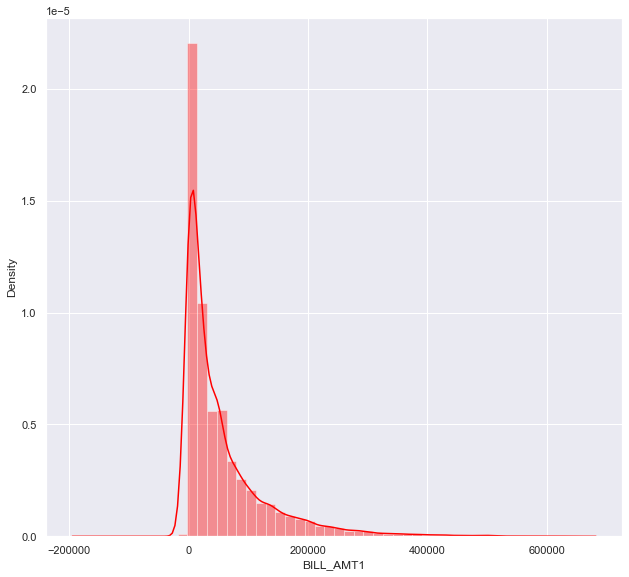

In [62]:
fig=plt.figure(figsize=(10,9))
axes=fig.add_axes([0,0,0.8,0.8])
dist=sns.distplot(df["BILL_AMT1"],color="red")
axes.ticklabel_format(style="plain",axis="x")

#### interpretation : on remarque que les valeurs qui depassent les 400000 sont des valeurs abérantes 

In [63]:
# affichage les observations ayant BILL_AMT2 comme valeurs supp à 400000
df[df["BILL_AMT1"]>400000]


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
59,400000.0,29,0,0,0,0,0,0,400134.0,398857.0,...,0,1,0,0,0,1,0,0,0,1
102,480000.0,63,0,0,0,2,2,0,422069.0,431342.0,...,1,0,0,0,0,1,0,0,1,0
360,500000.0,23,4,3,2,0,0,0,507726.0,509229.0,...,0,1,0,0,0,0,1,0,0,1
407,500000.0,37,1,2,0,0,0,0,507062.0,491956.0,...,1,0,0,0,0,1,0,0,1,0
451,600000.0,53,2,2,0,0,0,0,467150.0,458862.0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000.0,37,0,0,2,0,0,0,474934.0,507062.0,...,1,0,0,0,0,1,0,0,1,0
29837,500000.0,34,0,0,0,0,0,0,494356.0,488578.0,...,1,0,0,0,0,0,1,0,1,0
29871,420000.0,31,0,0,0,0,0,0,405274.0,411980.0,...,0,1,0,0,0,0,1,0,1,0
29883,420000.0,34,0,0,0,0,0,0,454391.0,466810.0,...,1,0,0,0,0,1,0,0,1,0


In [64]:
# l'affichage des lignes apres la suppression
df.drop((df[df["BILL_AMT1"]>400000]).index,inplace=True)
df

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,1,0,0,0,1,0,0,0,1
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,0,1,0,0,0,0,1,0,0,1
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,1,0,0,1
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,1,0,0,0,1
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,39,0,0,0,0,0,0,188948.0,192815.0,...,0,0,1,0,0,1,0,0,1,0
29996,150000.0,43,-1,-1,-1,-1,0,0,1683.0,1828.0,...,0,0,1,0,0,0,1,0,1,0
29997,30000.0,37,4,3,2,-1,0,0,3565.0,3356.0,...,0,1,0,0,0,0,1,0,1,0
29998,80000.0,41,1,-1,0,0,0,-1,-1645.0,78379.0,...,0,0,1,0,0,1,0,0,1,0


In [65]:
# de mm pour BILL_AMT2
df[df["BILL_AMT2"]>400000]

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
6,500000.0,29,0,0,0,0,0,0,367965.0,412023.0,...,1,0,0,0,0,0,1,0,1,0
1234,280000.0,30,0,0,0,0,0,0,270276.0,506260.0,...,1,0,0,0,0,0,1,0,0,1
8500,400000.0,28,-1,-1,2,0,0,0,6500.0,405016.0,...,1,0,0,0,0,1,0,0,0,1
13613,340000.0,25,-1,0,0,0,0,0,239715.0,421651.0,...,1,0,0,0,0,0,1,0,1,0
16201,400000.0,43,0,0,0,0,0,0,398711.0,407664.0,...,0,1,0,0,0,1,0,0,0,1
21227,410000.0,41,0,0,0,0,0,0,396975.0,409780.0,...,1,0,0,0,0,1,0,0,1,0
24553,600000.0,36,0,0,0,0,0,0,372396.0,416438.0,...,1,0,0,0,0,1,0,0,1,0
27378,410000.0,41,0,0,0,0,-1,0,392906.0,400864.0,...,0,1,0,0,0,1,0,0,1,0
28003,510000.0,30,-1,-1,-1,-1,0,0,71121.0,481382.0,...,1,0,0,0,0,0,1,0,0,1


In [66]:
#supp 
df.drop((df[df["BILL_AMT2"]>400000]).index,inplace=True)


In [67]:
# Bill _ AMT3
df[df["BILL_AMT3"]>400000]


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
3343,300000.0,27,0,0,0,0,0,0,286321.0,283547.0,...,0,1,0,0,0,1,0,0,0,1
5296,500000.0,33,-2,-2,-1,-1,-2,-1,125.0,-18088.0,...,1,0,0,0,0,1,0,0,0,1
6864,500000.0,30,0,0,0,0,0,0,192257.0,201402.0,...,1,0,0,0,0,0,1,0,1,0
8164,290000.0,56,0,0,0,0,0,0,222000.0,226917.0,...,1,0,0,0,0,1,0,0,1,0
15561,480000.0,43,0,0,0,0,0,0,377420.0,389573.0,...,1,0,0,0,0,1,0,0,1,0
21114,480000.0,49,0,0,0,0,0,0,376186.0,389822.0,...,1,0,0,0,0,1,0,0,1,0
24118,500000.0,27,0,0,0,0,0,0,252881.0,224633.0,...,1,0,0,0,0,0,1,0,1,0
25132,450000.0,52,0,0,0,0,0,0,388009.0,393535.0,...,1,0,0,0,0,1,0,0,1,0
25731,80000.0,37,0,0,-2,-2,-2,-1,47751.0,-215.0,...,0,0,1,0,0,1,0,0,0,1
26593,380000.0,32,0,0,0,0,0,0,387851.0,349973.0,...,1,0,0,0,0,0,1,0,1,0


In [68]:
df.drop((df[df["BILL_AMT3"]>400000]).index,inplace=True)

In [69]:
df[df["BILL_AMT4"]>400000]

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
40,360000.0,33,0,0,0,0,0,0,218668.0,221296.0,...,1,0,0,0,0,0,1,0,1,0
214,470000.0,27,2,2,2,2,0,0,296573.0,303320.0,...,0,1,0,0,0,0,1,0,1,0
7297,430000.0,40,-1,-1,-1,-1,-1,-1,6112.0,10548.0,...,1,0,0,0,0,1,0,0,1,0
15080,500000.0,38,0,-1,-1,0,0,0,130700.0,15785.0,...,1,0,0,0,0,0,1,0,1,0
24978,350000.0,33,-2,-2,-2,-1,0,0,6015.0,8751.0,...,1,0,0,0,0,0,1,0,1,0
28743,440000.0,29,-1,-1,-1,-1,0,0,23147.0,88848.0,...,0,1,0,0,0,0,1,0,0,1


In [70]:
df.drop((df[df["BILL_AMT4"]>400000]).index,inplace=True)

In [71]:
df[df["BILL_AMT5"]>400000]

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
5035,400000.0,45,0,0,2,0,0,2,337135.0,373869.0,...,0,1,0,0,0,1,0,0,1,0
13442,610000.0,35,0,0,0,0,0,0,389335.0,388150.0,...,1,0,0,0,0,0,1,0,0,1
13782,380000.0,49,2,0,0,0,0,0,380933.0,380703.0,...,1,0,0,0,0,1,0,0,1,0
24937,450000.0,37,1,2,0,0,0,0,387192.0,379442.0,...,1,0,0,0,0,1,0,0,1,0


In [72]:
df.drop((df[df["BILL_AMT5"]>400000]).index,inplace=True)

In [73]:
df[df["BILL_AMT6"]>400000]


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
9321,500000.0,34,0,0,0,0,0,0,119451.0,143348.0,...,1,0,0,0,0,0,1,0,0,1
13863,520000.0,41,-2,-2,-1,0,0,0,7322.0,2728.0,...,0,0,1,0,0,1,0,0,0,1
28037,500000.0,29,0,0,0,0,-1,-1,28555.0,33055.0,...,1,0,0,0,0,0,1,0,0,1


In [74]:
df.drop((df[df["BILL_AMT6"]>400000]).index,inplace=True)

In [75]:
df.shape

(27157, 31)

### Normalisation 

In [76]:
#normalisation : redimensionner l'échelle
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
X

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
0,-1.104993,-1.225791,1.842220,1.779890,-0.913649,-0.878093,-1.816025,-1.749454,-0.688180,-0.692073,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,-0.820856,0.820856
1,-0.314172,-1.009308,-1.094455,1.779890,-0.007813,0.047390,0.096758,1.989492,-0.704642,-0.711088,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,-0.820856,0.820856
2,-0.551418,-0.143376,-0.115564,-0.040248,-0.007813,0.047390,0.096758,0.120019,-0.349505,-0.541206,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,-0.820856,0.820856
3,-0.867747,0.181348,-0.115564,-0.040248,-0.007813,0.047390,0.096758,0.120019,-0.112128,-0.068845,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,-0.820856,0.820856
4,-0.867747,2.346178,-1.094455,-0.040248,-0.913649,0.047390,0.096758,0.120019,-0.625275,-0.656610,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,1.218241,-1.218241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,0.476649,0.397831,-0.115564,-0.040248,-0.007813,0.047390,0.096758,0.120019,1.786220,1.927734,...,-0.714505,-0.959869,2.229909,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,1.218241,-1.218241
27356,-0.076926,0.830797,-1.094455,-0.950317,-0.913649,-0.878093,0.096758,0.120019,-0.718001,-0.709666,...,-0.714505,-0.959869,2.229909,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,1.218241,-1.218241
27357,-1.025911,0.181348,3.800003,2.689959,1.803858,-0.878093,0.096758,0.120019,-0.692834,-0.688565,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,1.218241,-1.218241
27358,-0.630500,0.614314,0.863328,-0.950317,-0.007813,0.047390,0.096758,-0.814717,-0.762505,0.347451,...,-0.714505,-0.959869,2.229909,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,1.218241,-1.218241


In [238]:
#separation des features et label
x = df.drop('def_pay',axis=1)
y = df['def_pay']
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1.0,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2.0,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3.0,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4.0,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5.0,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996.0,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997.0,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998.0,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999.0,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## Pre-Processing

##### Nous allons former un certain nombre de classificateurs différents et voir à quel point ils fonctionnent. 
##### Decomposer la dataframe  en train_set/test_set 

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [78]:
X


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,graduate school,university,high school,others,OTHERS,married,single,divorce,male,female
0,-1.104993,-1.225791,1.842220,1.779890,-0.913649,-0.878093,-1.816025,-1.749454,-0.688180,-0.692073,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,-0.820856,0.820856
1,-0.314172,-1.009308,-1.094455,1.779890,-0.007813,0.047390,0.096758,1.989492,-0.704642,-0.711088,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,-0.820856,0.820856
2,-0.551418,-0.143376,-0.115564,-0.040248,-0.007813,0.047390,0.096758,0.120019,-0.349505,-0.541206,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,-0.820856,0.820856
3,-0.867747,0.181348,-0.115564,-0.040248,-0.007813,0.047390,0.096758,0.120019,-0.112128,-0.068845,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,-0.820856,0.820856
4,-0.867747,2.346178,-1.094455,-0.040248,-0.913649,0.047390,0.096758,0.120019,-0.625275,-0.656610,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,1.218241,-1.218241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27355,0.476649,0.397831,-0.115564,-0.040248,-0.007813,0.047390,0.096758,0.120019,1.786220,1.927734,...,-0.714505,-0.959869,2.229909,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,1.218241,-1.218241
27356,-0.076926,0.830797,-1.094455,-0.950317,-0.913649,-0.878093,0.096758,0.120019,-0.718001,-0.709666,...,-0.714505,-0.959869,2.229909,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,1.218241,-1.218241
27357,-1.025911,0.181348,3.800003,2.689959,1.803858,-0.878093,0.096758,0.120019,-0.692834,-0.688565,...,-0.714505,1.041809,-0.448449,-0.123647,-0.041482,-0.904534,0.928499,-0.106703,1.218241,-1.218241
27358,-0.630500,0.614314,0.863328,-0.950317,-0.007813,0.047390,0.096758,-0.814717,-0.762505,0.347451,...,-0.714505,-0.959869,2.229909,-0.123647,-0.041482,1.105542,-1.077007,-0.106703,1.218241,-1.218241


In [79]:
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: def_pay, Length: 27360, dtype: int32

In [80]:
# 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# IV. Modeling 

#####  Nous allons créer 6 modèles pour faire des prédictions : Decisional Tree/KNN /Random Forest /Naive de Bayes/SVM /Regression Logistique/AdaBoost
##### Pour évaluer  la performance des modèles de classifications, nous présentons 4 indicateurs qui sont calculé à partir de la matrice de confusion : (Accuracy,Recall,Precision,F1_Score)

<h2 style="color: red;"> Methodes Simples : </h2> 

## Decisional Tree

In [249]:
# Load libraries
import pandas as pd
from sklearn.metrics import f1_score,confusion_matrix,classification_report,roc_curve, auc
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
#from imblearn.over_sampling import SMOTE


In [250]:
DecisionTree=DecisionTreeClassifier()
def evaluation(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train, y_train)  #entrainement en utilisant la méthode .fit()
    ypred = model.predict(X_test)  #prédiction pour led données de test pour povoir evaluer notre modele  
    plot_confusion_matrix(model, X_test, y_test,display_labels=df.def_pay.unique(),cmap=plt.cm.Blues)
    print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4284
           1       0.37      0.41      0.39      1188

    accuracy                           0.72      5472
   macro avg       0.60      0.61      0.61      5472
weighted avg       0.73      0.72      0.73      5472

Wall time: 923 ms


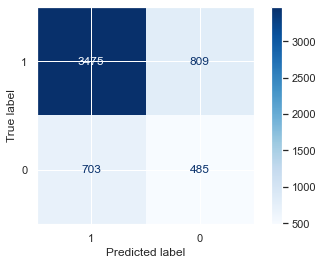

In [251]:

%time evaluation(DecisionTree)

## Appliquant GridSearchCV


              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4284
           1       0.65      0.39      0.48      1188

    accuracy                           0.82      5472
   macro avg       0.75      0.66      0.69      5472
weighted avg       0.80      0.82      0.80      5472



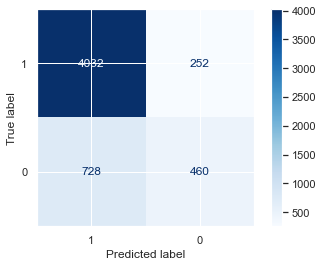

In [252]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,29)}
gridDecisionTree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=6)
gridDecisionTree.fit(X_train,y_train)
evaluation(gridDecisionTree.best_estimator_)

## Roc

In [253]:
ypred = gridDecisionTree.best_estimator_.predict(X_test)
fprTree, tprTree, thresholdTree = roc_curve(y_test,ypred)
rocTree = auc(fprTree, tprTree)

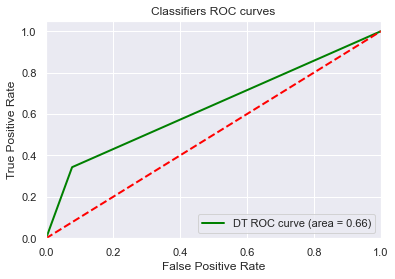

In [273]:
plt.figure() 

plt.plot(fprKnn, tprKnn, color='green', lw=2, label='DT ROC curve (area = %0.2f)'% rocTree)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

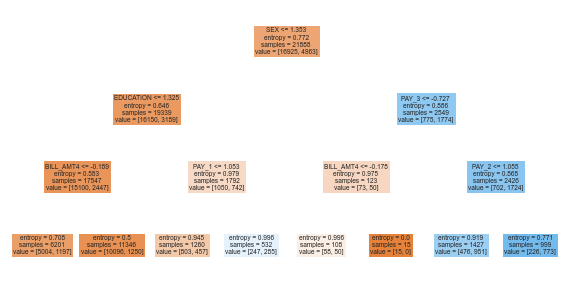

In [254]:
#Traçage de l'arbre de décision
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(gridDecisionTree.best_estimator_, feature_names=df.columns, filled=True)
plt.show()

 #### On remarque donc que le deuxième modèle est meilleur que le premier avec une accuracy de 0.82.

## KNN

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.neighbors import KNeighborsClassifier

In [88]:
Knn=KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      4284
           1       0.55      0.34      0.42      1188

    accuracy                           0.80      5472
   macro avg       0.69      0.63      0.65      5472
weighted avg       0.77      0.80      0.78      5472



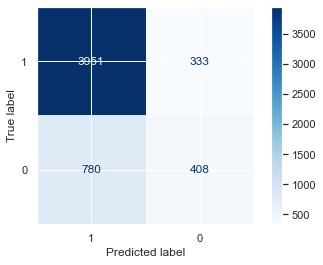

In [89]:
evaluation(Knn)

Text(0, 0.5, 'Erreur')

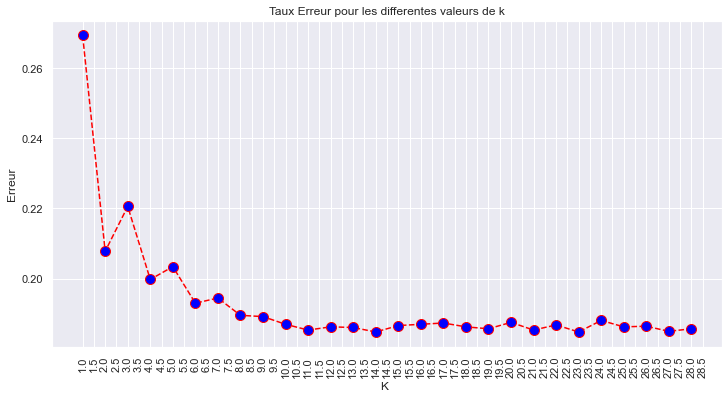

In [161]:
# choisir le nombre optimal des voisins 
error = []
for i in range(1, 29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.xticks(np.arange(1, 29, 0.5),rotation=90)
plt.ylabel('Erreur')

In [258]:
knn = KNeighborsClassifier(23)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [259]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.82


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4284
           1       0.65      0.32      0.43      1188

    accuracy                           0.82      5472
   macro avg       0.74      0.64      0.66      5472
weighted avg       0.79      0.82      0.79      5472



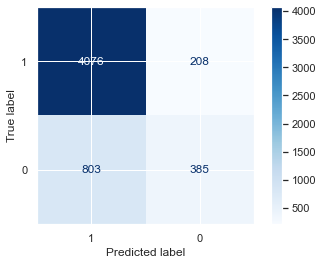

In [260]:
from sklearn.metrics import classification_report
evaluation(KNeighborsClassifier(n_neighbors=23))

## Roc KNN

In [263]:
ypred = Knn.predict(X_test)
fprKnn, tprKnn, thresholdKnn = roc_curve(y_test,ypred)
rocKnn = auc(fprKnn, tprKnn)

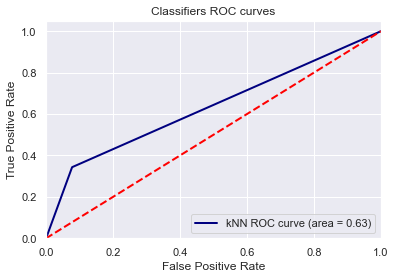

In [274]:
plt.figure() 

plt.plot(fprKnn, tprKnn, color='navy', lw=2, label='kNN ROC curve (area = %0.2f)'% rocKnn)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

## Naive de Bayes

In [106]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,CategoricalNB
from sklearn.metrics import accuracy_score , precision_score,recall_score,confusion_matrix,precision_recall_curve


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% training and 20% test

In [110]:
def CMatrix (CM,labels=['pay','default']):
    df = pd.DataFrame(data=CM , index=labels ,columns=labels)
    df.index.name='TRUE'
    df.columns.name='Prediction'
    df.loc['Total' ] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [111]:
# Function that handles sample splitting, model fitting and report printing 
def mfunc(X, y, typ):
    
    # Create training and testing samples
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Fit the model
    model = typ
    clf = model.fit(X_train, y_train)

    # Predict class labels on a test data
    pred_labels = model.predict(X_test)

    # Print model attributes 
    print('Classes: ', clf.classes_) # class labels known to the classifier
    if str(typ)=='GaussianNB()':
        print('Class Priors: ',clf.class_prior_) # prior probability of each class.
    else: 
        print('Class Log Priors: ',clf.class_log_prior_) # log prior probability of each class.
        
    # Use score method to get accuracy of the model
    print('--------------------------------------------------------')
    score = model.score(X_test, y_test)
    print('Accuracy Score: ', score)
    print('--------------------------------------------------------')
    
    # Look at classification report to evaluate the model
    print(classification_report(y_test, pred_labels))
    
    # Return relevant data for chart plotting
    return X_train, X_test, y_train, y_test, clf, pred_labels


In [112]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.naive_bayes import GaussianNB

metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                     columns=['Gaussian NB'])
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score


cm = confusion_matrix(y_test, y_pred)
CMatrix(cm)

Prediction,pay,default,Total
TRUE,,,
pay,2606,1678,4284
default,299,889,1188
Total,2905,2567,5472


In [119]:
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, GaussianNB())

Classes:  [0 1]
Class Priors:  [0.77325475 0.22674525]
--------------------------------------------------------
Accuracy Score:  0.6387061403508771
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.61      0.72      4284
           1       0.35      0.75      0.47      1188

    accuracy                           0.64      5472
   macro avg       0.62      0.68      0.60      5472
weighted avg       0.78      0.64      0.67      5472



In [120]:
metrics.loc['accuracy','Gaussian NB'] = accuracy_score(y_test,y_pred)
metrics.loc['precision','Gaussian NB'] = precision_score(y_test,y_pred)
metrics.loc['recall','Gaussian NB'] = recall_score(y_test,y_pred)
metrics

,Gaussian NB
accuracy,0.804094
precision,0.556974
recall,0.477273


In [121]:
metricss = pd.DataFrame(index=['accuracy','precision','recall'],
                     columns=['Bernoulli NB'])
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score


cm = confusion_matrix(y_test, y_pred)
CMatrix(cm)


Prediction,pay,default,Total
TRUE,,,
pay,3833,451,4284
default,621,567,1188
Total,4454,1018,5472


In [122]:
X_train, X_test, y_train, y_test, clf, pred_labels, = mfunc(X, y, BernoulliNB())

Classes:  [0 1]
Class Log Priors:  [-0.25714672 -1.48392814]
--------------------------------------------------------
Accuracy Score:  0.804093567251462
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      4284
           1       0.56      0.48      0.51      1188

    accuracy                           0.80      5472
   macro avg       0.71      0.69      0.70      5472
weighted avg       0.79      0.80      0.80      5472



In [123]:
metricss.loc['accuracy','Bernoulli NB'] = accuracy_score(y_test,y_pred)
metricss.loc['precision','Bernoulli NB'] = precision_score(y_test,y_pred)
metricss.loc['recall','Bernoulli NB'] = recall_score(y_test,y_pred)
metricss

,Bernoulli NB
accuracy,0.804094
precision,0.556974
recall,0.477273


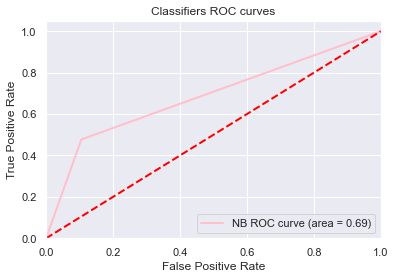

In [275]:
ypred = classifier.predict(X_test)
fprNB, tprNB, thresholdNB = roc_curve(y_test,ypred)
rocNB = auc(fprNB, tprNB)

plt.figure() 

plt.plot(fprNB, tprNB, color='pink', lw=2, label='NB ROC curve (area = %0.2f)'% rocNB)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

## SVM 

In [129]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [130]:
from sklearn.metrics import classification_report
y_pred_ = svm.predict(X_test)
print(classification_report(y_pred_, y_test))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      4862
           1       0.35      0.69      0.47       610

    accuracy                           0.82      5472
   macro avg       0.65      0.77      0.68      5472
weighted avg       0.89      0.82      0.85      5472



## Regression Logistic

In [131]:
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn import metrics
from sklearn.metrics import f1_score,confusion_matrix, mean_squared_error, mean_absolute_error, classification_report, roc_auc_score, roc_curve, precision_score, recall_score


In [132]:
# Setup the hyperparameter grid, (not scaled data)
param_grid = {'C': np.logspace(-5, 8, 15)}

# Instantiate a logistic regression classifier
logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg,param_grid , cv=5, random_state=0)

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))

Tuned Logistic Regression Parameters: {'C': 3.727593720314938}


In [133]:
#indicateurs de performance 
from sklearn.metrics import confusion_matrix, accuracy_score
LR = LogisticRegression(C=0.00005, random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

## 5-fold cross-validation 
cv_scores =cross_val_score(LR, X, y, cv=5)
# Print the 5-fold cross-validation scores
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.7841739766081871

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4284
           1       0.62      0.02      0.03      1188

    accuracy                           0.78      5472
   macro avg       0.70      0.51      0.45      5472
weighted avg       0.75      0.78      0.69      5472


Average 5-Fold CV Score: 0.7773 , Standard deviation: 0.0009


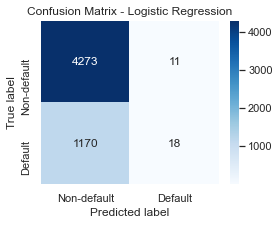

In [134]:
# graphe of Confusion Matrix ; 

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(y_test,LR.predict(X_test))
sns.heatmap(ConfMatrix,annot=True, cmap="Blues", fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix - Logistic Regression");

Le modèle n'a pas le pouvoir de prédire les cartes de crédit par défaut. Cependant, on peut observer que la précision moyenne du modèle est d'environ 78%, ce qui démontre que cette métrique n'est pas appropriée pour l'évaluation de ce problème.

## GridSearchCV Logistic Regression


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4284
           1       0.69      0.29      0.41      1188

    accuracy                           0.82      5472
   macro avg       0.76      0.63      0.65      5472
weighted avg       0.80      0.82      0.79      5472



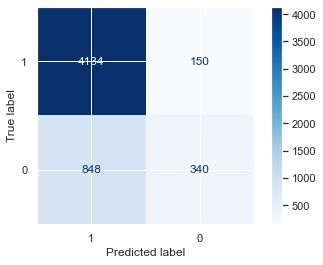

In [160]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
evaluation(LogisticRegression)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4284
           1       0.69      0.29      0.41      1188

    accuracy                           0.82      5472
   macro avg       0.76      0.63      0.65      5472
weighted avg       0.80      0.82      0.79      5472



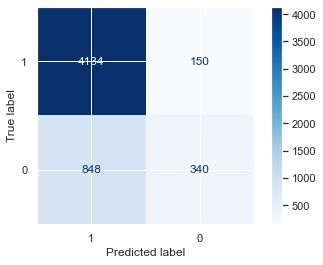

In [161]:
 
param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'max_iter': [100,1000, 2000, 3000]}
grid_LogisticRegression=GridSearchCV(LogisticRegression,param_grid,cv=5)
grid_LogisticRegression.fit(X_train,y_train)
evaluation(grid_LogisticRegression.best_estimator_)

In [162]:
ypred = grid_LogisticRegression.best_estimator_.predict(X_test)
fprLR, tprLR, thresholdLR = roc_curve(y_test,ypred)
rocLR = auc(fprLR, tprLR)

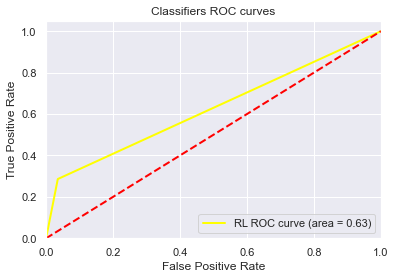

In [286]:
from sklearn.linear_model import LogisticRegression
ypred = grid_LogisticRegression.best_estimator_.predict(X_test)
fprLR, tprLR, thresholdLR = roc_curve(y_test,ypred)
rocLR = auc(fprLR, tprLR)
plt.figure() 

plt.plot(fprLR, tprLR, color='yellow', lw=2, label='RL ROC curve (area = %0.2f)'% rocLR)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

<h2 style="color: red;"> Methodes Ensemblistes : </h2> 

## Random Forest 

In [99]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [100]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [264]:
# Making predictions
predictions = rfc.predict(X_test)

In [265]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [266]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4284
           1       0.65      0.37      0.47      1188

    accuracy                           0.82      5472
   macro avg       0.75      0.66      0.68      5472
weighted avg       0.80      0.82      0.80      5472



### GridSearchCV RandomForest

In [268]:
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators =25, random_state = 1)
rf_model_initial.fit(X_train,y_train)
y_pred_rf = rf_model_initial.predict(X_test)
print("Random Forest accuracy for 25 trees is :",rf_model_initial.score(X_test,y_test))


Random Forest accuracy for 25 trees is : 0.8181652046783626


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4284
           1       0.67      0.37      0.48      1188

    accuracy                           0.82      5472
   macro avg       0.76      0.66      0.68      5472
weighted avg       0.81      0.82      0.80      5472

Wall time: 23.3 s


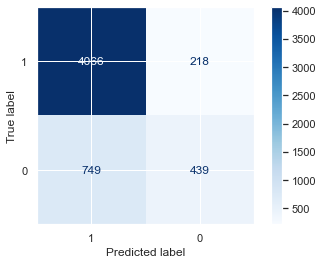

In [269]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, y_train)
%time evaluation(CV_rfc.best_estimator_)

In [270]:
ypred = rf_model_initial.predict(X_test)
fprRF, tprRF, thresholdRF = roc_curve(y_test,ypred)
rocRF = auc(fprRF, tprRF)

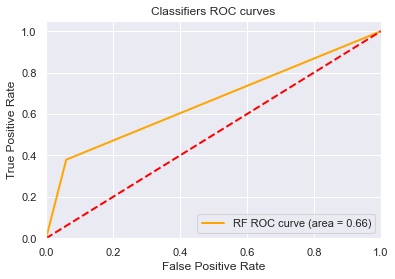

In [272]:
plt.figure() 

plt.plot(fprRF, tprRF, color='orange', lw=2, label='RF ROC curve (area = %0.2f)'% rocRF)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

## ADABOOST

In [175]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
adaboostclassifier = AdaBoostClassifier(base_estimator=None, 
                                         n_estimators=50, 
                                         learning_rate=1.5, 
                                         algorithm='SAMME', 
                                         random_state=42)

adaboostclassifier.fit(X_train, y_train.values)
adaboostprediction = adaboostclassifier.predict(X_test)
print('Accuracy of Ada Boost:', accuracy_score(adaboostprediction,y_test))

Accuracy of Ada Boost: 0.8196271929824561


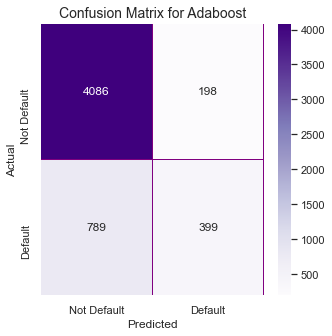

In [177]:
cmadaboost = pd.crosstab(y_test.values, adaboostprediction, 
                     rownames=['Actual'], colnames=['Predicted'])
fig, (ax4) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cmadaboost, fmt="d",
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax4,
            linewidths=.2,linecolor="Purple", cmap="Purples")
plt.title('Confusion Matrix for Adaboost', fontsize=14)
plt.show()



In [179]:
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,roc_curve
rocaucscoreadaboost=roc_auc_score(y_test.values, adaboostprediction)
print('Roc Score: ',rocaucscoreadaboost)

Roc Score:  0.6448200492318139


## Courbe ROC AdaBoost

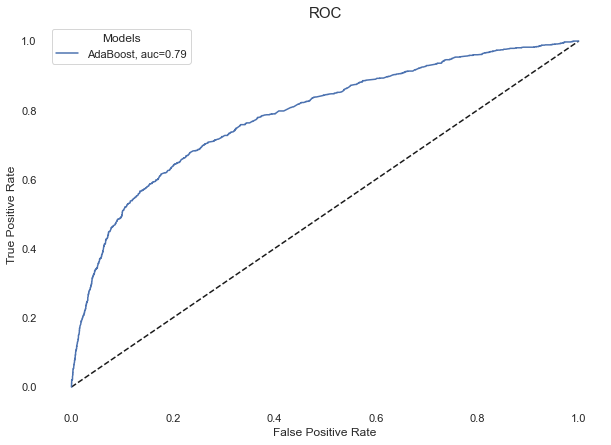

In [287]:
y_pred  = adaboostclassifier.predict_proba(X_test)[::,1]
fprAB, tprAB, _ = roc_curve(y_test,  y_pred)
auc_AB = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(10,7))
plt.title('ROC', size=15)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprAB,tprAB,label="AdaBoost, auc="+str(round(auc4,2)))
plt.legend(loc='best', title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.box(False)
plt.grid()
plt.show()

## Evaluation

### Courbe ROC

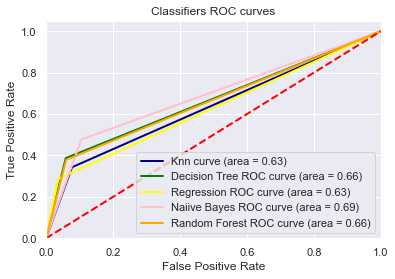

In [291]:
plt.figure() 
plt.plot(fprKnn, tprKnn, color='navy', lw=2, label='Knn curve (area = %0.2f)'% rocKnn)
plt.plot(fprTree, tprTree, color='green', lw=2, label='Decision Tree ROC curve (area = %0.2f)'% rocTree)
plt.plot(fprLR, tprLR, color='yellow', lw=2, label='Regression ROC curve (area = %0.2f)'% rocLR)
#plt.plot(fpr2, tpr2, color='red', lw=2, label='SVM curve (area = %0.2f)'% roc_auc2)
plt.plot(fprNB, tprNB, color='pink', lw=2, label='Naiive Bayes ROC curve (area = %0.2f)'% rocNB)
plt.plot(fprRF, tprRF, color='orange', lw=2, label='Random Forest ROC curve (area = %0.2f)'% rocRF)
#plt.plot(fprAB, tprAB, color='red', lw=2, label='Adaboost ROC curve (area = %0.2f)'% auc_AB)



plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

Nous avons étudié les données, vérifié le déséquilibre des données, visualisé les caractéristiques et compris la relation entre les différentes caractéristiques.

Nous avons ensuite étudié 5 modèles prédictifs :

Nous avons commencé avec le Classifier Decision Tree , pour lequel nous avons obtenu un score AUC  de 0,66.
Ensuite, nous avons utilisé le modèle KNN, avec un score AUC inférieur (0,63).
Nous avons suivi avec le modèle Naive Bayes, avec un score AUC supérieur (0,69).
Ensuite, nous avons expérimenté le modèle de Regression logistique , pour lequel le score AUC obtenu était de (0,63).
Aprés , nous avons utilisé le modèle Random Forest , avec un score Auc (0.66)
Nous avons ensuite présenté les données à un modèle Adaboost . la  valeur d'AUC obtenue pour l'ensemble de validation était d'environ 0,79.

### Accuracy

In [ ]:
On comparant l indicateur de performance Accuracy de chaque modéle : 
    Nous avons commencé avec le Classifier Decision Tree , pour lequel nous avons obtenu une val score AUC de 0,72.
    Ensuite, nous avons utilisé le modèle KNN, avec un score AUC inférieur (0,80). 
    Nous avons suivi avec le modèle Naive Bayes, avec un score AUC supérieur (0,64). 
    Ensuite, nous avons expérimenté le modèle de Regression logistique , pour lequel le score AUC obtenu était de (0,78). 
    Aprés , nous avons utilisé le modèle Random Forest , avec un score Auc (0.) 
    Nous avons ensuite présenté les données à un modèle Adaboost . la valeur d'AUC obtenue pour l'ensemble de validation était d'environ 0,79.